Sales Assignment Analysis

In [357]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np


In [358]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assinment_1(SalesData)/sales_data.csv")

In [359]:
df.head() # taking an overview of the data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [361]:
top_products = df['Product'].value_counts().nlargest(5).index.tolist() # exracting top five most frequent products with count

In [362]:
top_products

['Product_45', 'Product_5', 'Product_33', 'Product_1', 'Product_13']

In [363]:
# Filling in empty cells randomly with top five products
df['Product'] = df['Product'].apply(lambda x: np.random.choice(top_products) if pd.isnull(x) else x)

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [365]:
top_regions = df['Region'].value_counts().nlargest(5).index.tolist() # now extracting top 5 regions to fill in empty region cells
top_regions

['Region_9', 'Region_10', 'Region_4', 'Region_8', 'Region_3']

In [366]:
df['Region'] = df['Region'].apply(lambda x: np.random.choice(top_regions) if pd.isnull(x) else x)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [368]:
newdf1 = df.copy() # making a copy of the dataframe to avoid new error in the main dataset
newdf2= df.copy()

In [369]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [370]:
newdf1['Price'].fillna(newdf1.groupby('Product')['Price'].transform('mean'), inplace=True) # filling in empty price cells with the mean of corresponding product 

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [372]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [373]:
newdf1['Units Sold'].fillna(newdf1.groupby('Product')['Units Sold'].transform('mean'), inplace=True) # filling in empty Units Sold cells with the mean of corresponding product

In [374]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [375]:
newdf1['Revenue'] = newdf1['Price'] * newdf1['Units Sold'] # adding a new coluumn called 'Revenue' to analyse the sales
newdf1.head()

,Product,Region,Price,Units Sold,Sale Date,Revenue
0,Product_5,Region_6,75.96,10.0,2022-01-01,759.60
1,Product_45,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14


In [376]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
 5   Revenue     1050 non-null   float64
dtypes: float64(3), object(3)
memory usage: 49.3+ KB


In [377]:
#newdf1.to_csv('C:/Users/supra/OneDrive/Desktop/export_modifyydate.csv', index=False) # exporting the dataset to csv to analyse the dataset manually.


In [378]:
newdf1.drop_duplicates(inplace=True)

In [379]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1048
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1006 non-null   object 
 1   Region      1006 non-null   object 
 2   Price       1006 non-null   float64
 3   Units Sold  1006 non-null   float64
 4   Sale Date   1006 non-null   object 
 5   Revenue     1006 non-null   float64
dtypes: float64(3), object(3)
memory usage: 55.0+ KB


In [380]:
df_units = newdf1[["Region", "Units Sold"]]
df_units.head()

,Region,Units Sold
0,Region_6,10.0
1,Region_1,8.0
2,Region_3,12.0
3,Region_1,10.0
4,Region_6,6.0


In [381]:
df_units.groupby("Region").sum()


,Units Sold
Region,
Region_1,866.241124
Region_10,1268.220478
Region_2,807.421560
Region_3,1184.392226
Region_4,1119.992830
Region_5,903.175848
Region_6,875.482655
Region_7,728.212500
Region_8,1127.679243


Text(0, 0.5, 'Units')

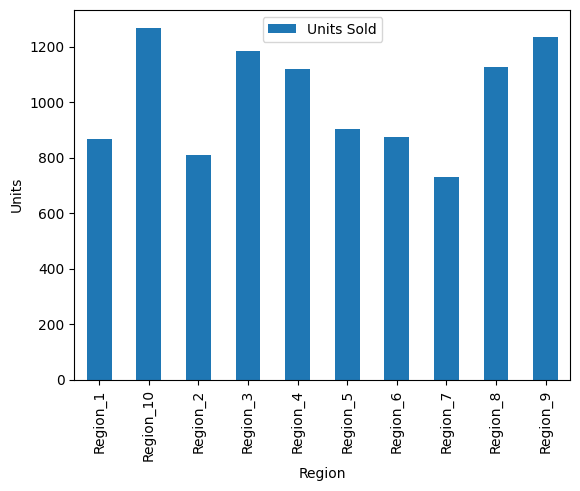

In [382]:
region_plot = df_units.groupby("Region").sum().plot(kind='bar')
region_plot.set_xlabel("Region")
region_plot.set_ylabel("Units")

In [396]:
df_units = newdf1[["Product","Region", "Units Sold"]]
df_units.shape

(1006, 3)

In [400]:
df_units.to_csv('C:/Users/supra/OneDrive/Desktop/anothercopy.csv', index=False) # exporting the dataset to csv to analyse the dataset manually.
